In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd


In [3]:
data=pd.read_csv('ACME.csv')

## understanding data

In [10]:
data.head(10)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
5,1,5,5,3,5,5,5
6,0,3,1,2,2,1,3
7,1,5,4,4,4,4,5
8,0,4,1,4,4,4,4
9,0,4,4,4,2,5,5


In [8]:

print(data.shape) # from this : 20% of data will be a good part for testing

(126, 7)


In [9]:
data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


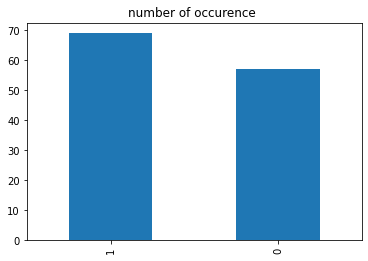

In [16]:
import matplotlib.pyplot as plt
number_of_occurence = data["Y"].value_counts()
number_of_occurence.plot(kind='bar',title="number of occurence ")

In [21]:
dataframe_disatidfied = data.where(data["Y"]==0).dropna()
dataframe_satidfied = data.where(data["Y"]==1).dropna()
dataframe_satidfied.head()
#dataframe_disatidfied.head()

,Y,X1,X2,X3,X4,X5,X6
2,1.0,5.0,3.0,3.0,3.0,3.0,5.0
5,1.0,5.0,5.0,3.0,5.0,5.0,5.0
7,1.0,5.0,4.0,4.0,4.0,4.0,5.0
12,1.0,5.0,2.0,4.0,5.0,5.0,5.0
15,1.0,3.0,2.0,4.0,3.0,4.0,4.0


In [22]:
dataframe_satidfied.describe()

,Y,X1,X2,X3,X4,X5,X6
count,69.0,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,1.0,4.536232,2.507246,3.449275,3.797101,3.884058,4.376812
std,0.0,0.698311,1.106441,1.022342,0.900649,1.064621,0.768908
min,1.0,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.0,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.0,5.000000,2.000000,3.000000,4.000000,4.000000,5.000000
75%,1.0,5.000000,3.000000,4.000000,4.000000,5.000000,5.000000
max,1.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [23]:
dataframe_disatidfied.describe()

,Y,X1,X2,X3,X4,X5,X6
count,57.0,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,0.0,4.087719,2.561404,3.140351,3.684211,3.368421,4.105263
std,0.0,0.851064,1.134170,1.007802,0.848484,1.189712,0.838455
min,0.0,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000
25%,0.0,4.000000,2.000000,3.000000,3.000000,3.000000,3.000000
50%,0.0,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,0.0,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,0.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


from those two tables we can notice that all feautures have impact on satisfaction mark, so we can't decrease number of features

## spliting data

In [31]:
data = data.values


array([[0, 3, 3, 3, 4, 2, 4],
       [0, 3, 2, 3, 5, 4, 3],
       [1, 5, 3, 3, 3, 3, 5],
       [0, 5, 4, 3, 3, 3, 5],
       [0, 5, 4, 3, 3, 3, 5],
       [1, 5, 5, 3, 5, 5, 5],
       [0, 3, 1, 2, 2, 1, 3],
       [1, 5, 4, 4, 4, 4, 5],
       [0, 4, 1, 4, 4, 4, 4],
       [0, 4, 4, 4, 2, 5, 5],
       [0, 3, 2, 3, 3, 2, 3],
       [0, 4, 4, 3, 4, 4, 4],
       [1, 5, 2, 4, 5, 5, 5],
       [0, 4, 2, 4, 5, 4, 3],
       [0, 4, 1, 3, 3, 4, 3],
       [1, 3, 2, 4, 3, 4, 4],
       [0, 5, 3, 4, 5, 4, 5],
       [1, 5, 1, 4, 3, 4, 5],
       [0, 5, 1, 2, 4, 4, 5],
       [0, 4, 2, 4, 4, 4, 4],
       [1, 4, 2, 3, 3, 4, 4],
       [0, 4, 3, 5, 5, 5, 4],
       [0, 4, 3, 5, 5, 5, 4],
       [1, 5, 1, 2, 5, 2, 4],
       [1, 4, 3, 3, 3, 3, 4],
       [0, 3, 4, 3, 3, 2, 3],
       [1, 3, 3, 3, 5, 5, 5],
       [1, 3, 3, 1, 3, 3, 4],
       [1, 3, 3, 1, 3, 3, 4],
       [1, 5, 3, 3, 3, 5, 3],
       [0, 5, 3, 3, 3, 5, 3],
       [0, 4, 1, 3, 4, 4, 5],
       [1, 3, 2, 4, 4, 4, 5],
       [1,

In [34]:
y,X= data[:,0],data[:,1:-1]
print(X.shape)
print(y.shape)

(126, 5)
(126,)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100, 5)
(26, 5)
(100,)
(26,)


## building classification model 
### first let try KNN 


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


#### cheking for the best choice of K

In [57]:
DT_model = DecisionTreeClassifier(criterion="gini")
print(DT_model)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [58]:
DT_model.fit(X_train,y_train)
Y_predected=DT_model.predict(X_test)

print("test Accuracy: ", metrics.accuracy_score(y_test, DT_model.predict(X_test)))


test Accuracy:  0.7692307692307693
